# Plot and analyze anisotropy data

The anisotropy of magnetic susceptibility and remanence can give significant insight to geological processes. Phenomena such as sedimentary deposition, magma flow, and deformation can all lead to a preferred orientation of magnetic minerals. Such ``magnetic fabrics'' give rise to anisotropy. Additionally, paleomagnetic vectors can be influenced by magnetic fabrics in their direction and intensity which further motivates efforts to quantify anisotropy.

This notebook is focused on one of the most common types of anisotropy data which is anisotropy of magnetic susceptibility (AMS). The anisotropy of anhysteretic remanence (AARM) will be dealt with in a separate notebook.

## Introduction to anisotropy of magnetic susceptibility (AMS)

Magnetic susceptibility describes the relationship between an applied magnetic field and the magnetization that is induced by this field.

$M = \chi H$

where $M$ is the magnetization, $H$ is the applied field, and $\chi$ is the magnetic susceptibility. If a material is perfectly isotropic, the relationship described by $\chi$ is independent of the orientation of the sample relative to the applied field. However, if there is a different response in different orientations the material can be considered to be anisotropic. 

In practice, AMS is quantified by varying the orientation of a sample within the coils of a magnetic susceptibility bridge. By doing so, the length and orientation of the principal, major, and minor eigenvectors can be determined where:

$V_1 \geq V_2 \geq V_3$

these eigenvectors are also referred to in the literature as:

$K_{max} \geq K_{int} \geq K_{min}$

and can be illustrated as follows:

<figure>
  <img src="./book/images/AMS.png" alt="Description of the image" width="450">
  <figcaption>Anisotropy ellipsoid as illustrated in https://www.agico.cz/downloads/documents/agicoprints/ams_rocks_pres.pdf </figcaption>
</figure>

## Import scientific python libraries

Run the cell below to import the functions needed for the notebook.

In [1]:
import pandas as pd
import pmagpy.ipmag as ipmag
import pmagpy.contribution_builder as cb

import matplotlib.pyplot as plt
%matplotlib inline

## Import data

Here we will download data from a MagIC contribution associated with the study 

> Schwehr and Tauxe (2003). Characterization of soft-sediment deformation: Detection of cryptoslumps using magnetic methods. Geology 31 (3):203. doi:10.1130/0091-7613(2003)031<0203:COSSDD>2.0.CO;2.

We will set the directory, download the file from MagIC, unpack the MagIC file into its constituent tables, and make those tables into a Contribution object.

In [2]:
dir_path = 'example_data/anisotropy_slump'
result, magic_file = ipmag.download_magic_from_id('19571', directory=dir_path)
ipmag.unpack_magic(magic_file, dir_path)
contribution = cb.Contribution(dir_path)

working on:  'contribution'
1  records written to file  /Users/penokean/0000_GitHub/RockmagPy-notebooks/example_data/anisotropy_slump/contribution.txt
contribution  data put in  /Users/penokean/0000_GitHub/RockmagPy-notebooks/example_data/anisotropy_slump/contribution.txt
working on:  'locations'
1  records written to file  /Users/penokean/0000_GitHub/RockmagPy-notebooks/example_data/anisotropy_slump/locations.txt
locations  data put in  /Users/penokean/0000_GitHub/RockmagPy-notebooks/example_data/anisotropy_slump/locations.txt
working on:  'sites'
6  records written to file  /Users/penokean/0000_GitHub/RockmagPy-notebooks/example_data/anisotropy_slump/sites.txt
sites  data put in  /Users/penokean/0000_GitHub/RockmagPy-notebooks/example_data/anisotropy_slump/sites.txt
working on:  'samples'
17  records written to file  /Users/penokean/0000_GitHub/RockmagPy-notebooks/example_data/anisotropy_slump/samples.txt
samples  data put in  /Users/penokean/0000_GitHub/RockmagPy-notebooks/example_d

## Inspect data

Let's have a look at the anisotropy data which are provided at the specimen level in the specimens table. Of particular importance is the `aniso_s` column. This column is the anisotropy tensor diagonal elements as a six-element colon-delimited list.

In [3]:
specimens = contribution.tables['specimens'].df
specimens.dropna(axis=1, how='all').head() # see the first 5 measurements without empty columns

,aniso_s,aniso_s_mean,aniso_s_n_measurements,aniso_s_sigma,aniso_s_unit,aniso_type,citations,geologic_classes,geologic_types,lithologies,method_codes,sample,specimen
specimen name,,,,,,,,,,,,,
as1a1,0.34406999:0.34145039:0.31447965:-0.00168019:0...,0.000250,15,0.000525,SI,AMS,This study,Sedimentary,Sediment Layer,Shallow Marine Sediments,AE-H:LP-X,as1a,as1a1
as1a2,0.34351686:0.34047559:0.31600755:-0.00129778:0...,0.000229,15,0.000781,SI,AMS,This study,Sedimentary,Sediment Layer,Shallow Marine Sediments,AE-H:LP-X,as1a,as1a2
as1a3,0.34317553:0.34108347:0.315741:-0.00083286:0.0...,0.000235,15,0.000366,SI,AMS,This study,Sedimentary,Sediment Layer,Shallow Marine Sediments,AE-H:LP-X,as1a,as1a3
as1b1,0.34141964:0.34004751:0.31853285:-0.0005353:0....,0.000241,15,0.000546,SI,AMS,This study,Sedimentary,Sediment Layer,Shallow Marine Sediments,AE-H:LP-X,as1b,as1b1
as1b2,0.34097505:0.34068653:0.31833842:-0.00101421:0...,0.000230,15,0.000482,SI,AMS,This study,Sedimentary,Sediment Layer,Shallow Marine Sediments,AE-H:LP-X,as1b,as1b2


## Plot the data

The data can be plotted using the function `ipmag.aniso_magic_nb()`. 

An important aspect of AMS data analysis is estimating uncertainty associated with the mean eigenvectors. These means and there uncertainties are often determined through . There are two main approaches taken to develop estimates of the confidence ellipses associated with data from a given site:
- parametric Hext confidence ellipses
- non-parametric bootstrap confidence ellipses

Let's start by plotting the AMS data along with the Hext confidence ellipses

(True, [])

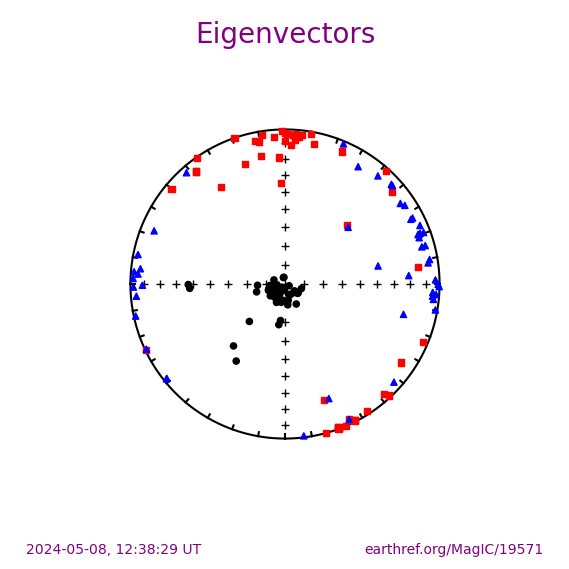

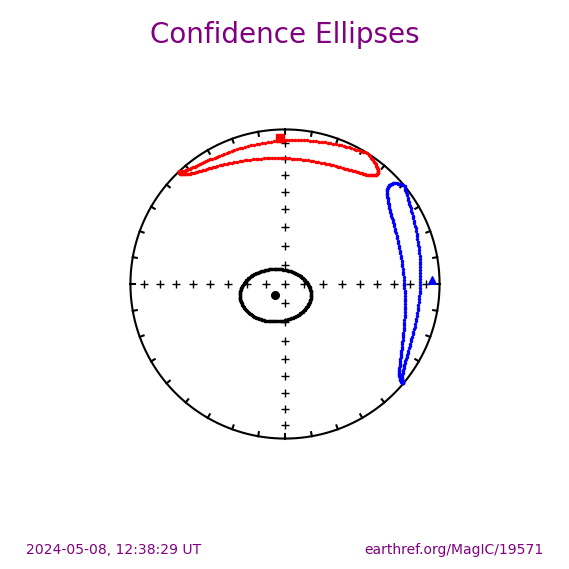

In [4]:
ipmag.aniso_magic_nb(contribution=contribution, 
                     ihext=True,
                     save_plots=False)

We can now plot with bootstrap determined estimate ellipses:

(True, [])

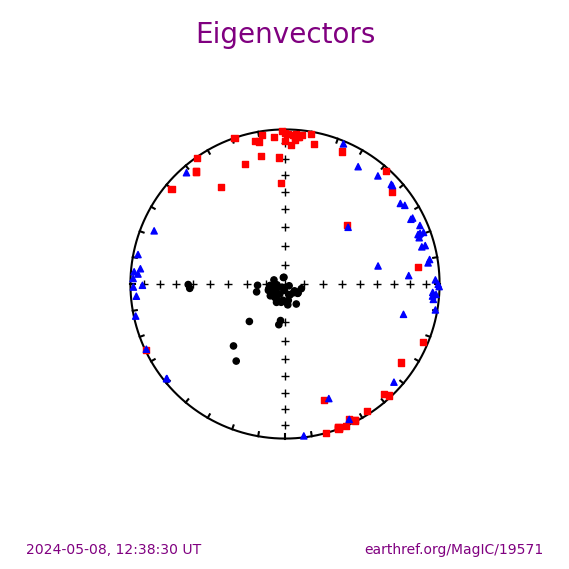

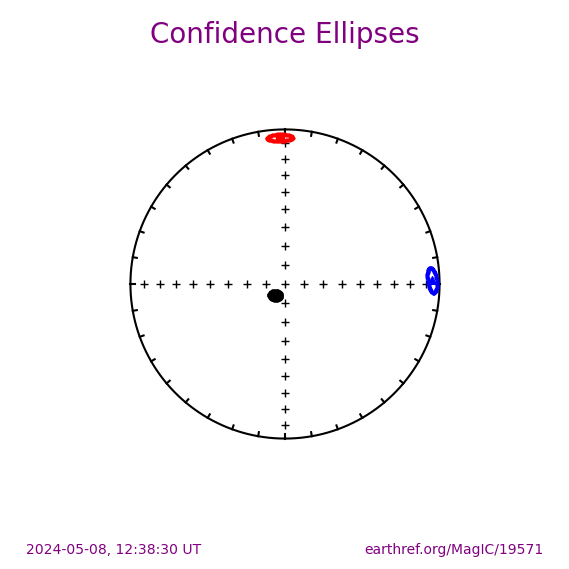

In [5]:
ipmag.aniso_magic_nb(contribution=contribution, 
                     ihext=False,
                     iboot=True,
                     save_plots=False)

and can see the actual bootstrap resampled means rather than the associated ellipses:

(True, [])

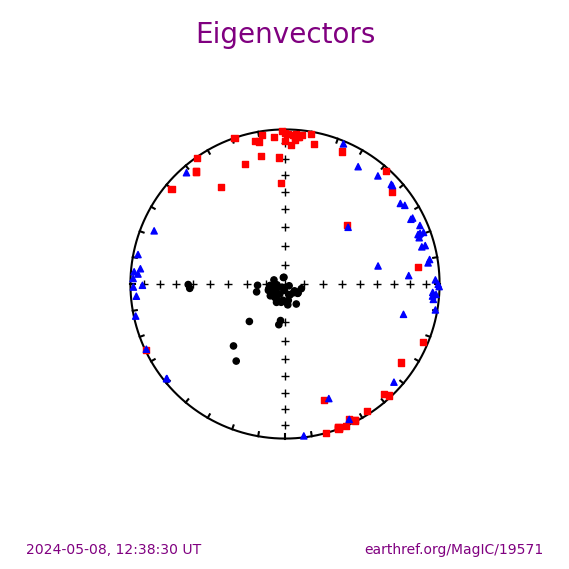

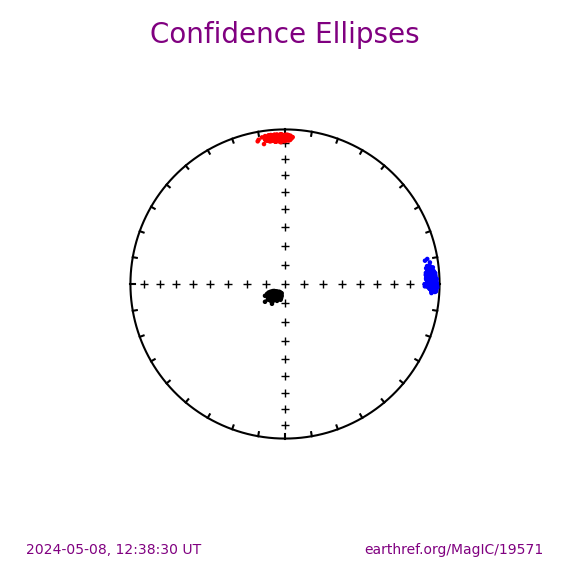

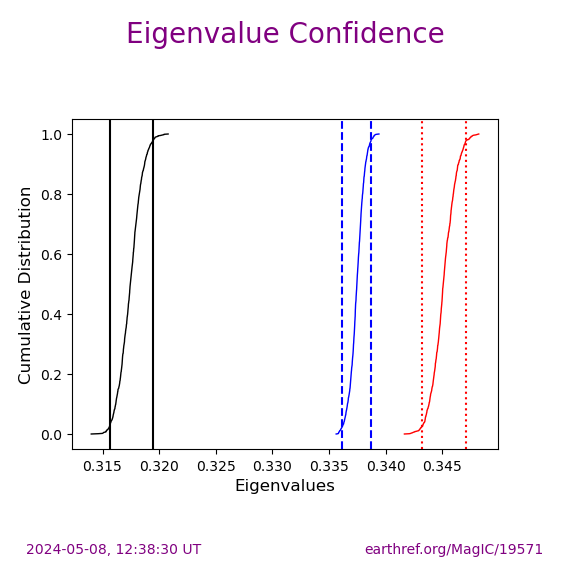

In [6]:
ipmag.aniso_magic_nb(contribution=contribution, 
                     ihext=False,
                     iboot=True,
                     ivec=True,
                     save_plots=False)

desired coordinate system not available, using available:  g


(True, [])

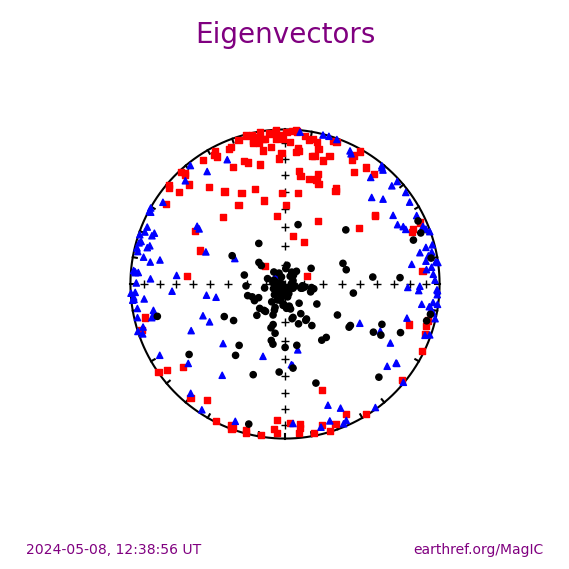

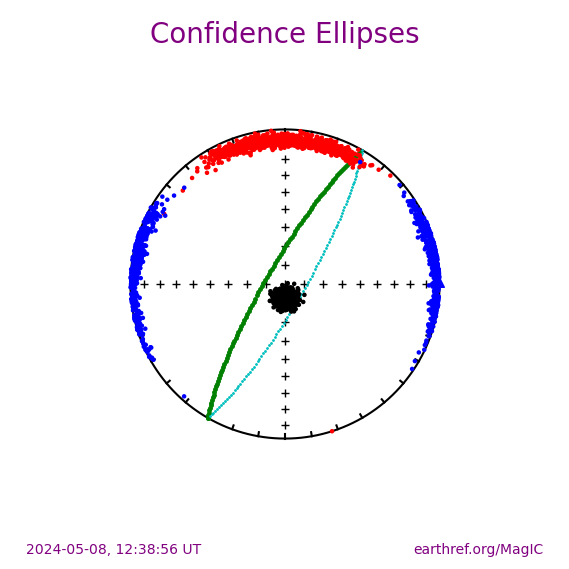

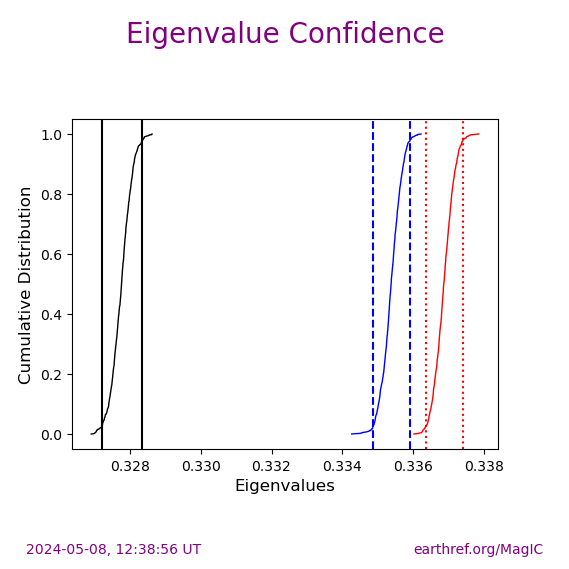

In [9]:
specimen_file = 'specimens.txt'
dir_path = 'example_data/anisotropy_sed'

ipmag.aniso_magic(infile=specimen_file,dir_path=dir_path,
       iboot=1,ihext=0,ivec=1,PDir=[120,10],ipar=1, save_plots=False) # compare dike directions with plane of dike with pole of 120,10

In [ ]:
ipmag.aniso_magic??

Signature:
ipmag.aniso_magic(
    infile='specimens.txt',
    samp_file='samples.txt',
    site_file='sites.txt',
    verbose=True,
    ipar=False,
    ihext=True,
    ivec=False,
    isite=False,
    iboot=False,
    vec=0,
    Dir=[],
    PDir=[],
    crd='s',
    num_bootstraps=1000,
    dir_path='.',
    fignum=1,
    save_plots=True,
    interactive=False,
    fmt='png',
    contribution=None,
    image_records=False,
)
Source:   
def aniso_magic(infile='specimens.txt', samp_file='samples.txt', site_file='sites.txt', verbose=True,
                ipar=False, ihext=True, ivec=False, isite=False, iboot=False, vec=0,
                Dir=[], PDir=[], crd="s", num_bootstraps=1000, dir_path=".", fignum=1,
                save_plots=True, interactive=False, fmt="png", contribution=None, image_records=False):
    """
    Makes plots of anisotropy eigenvectors, eigenvalues and confidence bounds
    All directions are on the lower hemisphere.

    Parameters:
        infile : specimens form

In [ ]:
ipmag.plot_aniso??

Signature:
ipmag.plot_aniso(
    fignum,
    aniso_df,
    Dir=[],
    PDir=[],
    ipar=False,
    ihext=True,
    ivec=False,
    iboot=False,
    vec=0,
    num_bootstraps=1000,
    title='',
)
Docstring: <no docstring>
Source:   
def plot_aniso(fignum, aniso_df, Dir=[], PDir=[], ipar=False, ihext=True, ivec=False,
               iboot=False, vec=0, num_bootstraps=1000, title=""):
    figs = {}
    ipar = int(ipar)
    ihext = int(ihext)
    ivec = int(ivec)
    iboot = int(iboot)
    Ss, V1, V2, V3 = [], [], [], []
    for ind, rec in aniso_df.iterrows():
        s = [float(i.strip()) for i in rec['aniso_s'].split(':')]
        if s[0] <= 1.0:
            Ss.append(s)  # protect against crap
            tau, Vdir = pmag.doseigs(s)
            V1.append([Vdir[0][0], Vdir[0][1]])
            V2.append([Vdir[1][0], Vdir[1][1]])
            V3.append([Vdir[2][0], Vdir[2][1]])
    Ss = np.array(Ss)
    if Ss.shape[0] > 1:
        # plot the data
        plot_net(fignum)
        figs['da

In [ ]:
ipmag.aniso_magic_nb??

Signature:
ipmag.aniso_magic_nb(
    infile='specimens.txt',
    samp_file='samples.txt',
    site_file='sites.txt',
    verbose=True,
    ipar=False,
    ihext=True,
    ivec=False,
    isite=False,
    iboot=False,
    vec=0,
    Dir=[],
    PDir=[],
    crd='s',
    num_bootstraps=1000,
    dir_path='.',
    fignum=1,
    save_plots=True,
    interactive=False,
    fmt='png',
    contribution=None,
)
Source:   
def aniso_magic_nb(infile='specimens.txt', samp_file='samples.txt', site_file='sites.txt', verbose=True,
                   ipar=False, ihext=True, ivec=False, isite=False, iboot=False, vec=0,
                   Dir=[], PDir=[], crd="s", num_bootstraps=1000, dir_path=".", fignum=1,
                   save_plots=True, interactive=False, fmt="png", contribution=None):
    """
    Wrapper for aniso_magic
    """
    return aniso_magic(infile, samp_file, site_file, verbose, ipar, ihext, ivec,
                       isite, iboot, vec, Dir, PDir, crd, num_bootstraps,
              